In [1]:
%load_ext autoreload
%autoreload 2

import os
from datetime import datetime
from time import time
# import dill
import pickle
import glob
import importlib
import numpy as np
import scipy as sp
import scipy.misc
import pandas as pd
import re
import itertools
from scanf import scanf
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import colors as mcolors
from matplotlib.colors import ListedColormap, BoundaryNorm, PowerNorm, Normalize
from mpl_toolkits.mplot3d import axes3d, Axes3D
from scipy.optimize import leastsq, curve_fit
from scipy import interpolate, integrate, optimize, sparse
from scipy.interpolate import interp1d, interp2d
from IPython.display import display, HTML, Math
from scipy import interpolate
from tqdm.notebook import tqdm as tqdm_notebook

# from act_act_src import baseClass
from act_src import particleClass
from act_src import interactionClass
from act_src import problemClass
from act_src import relationClass
from act_codeStore.support_class import *
from act_codeStore import support_fun

PWD = os.getcwd()
np.set_printoptions(linewidth=110, precision=5)

params = {'animation.html': 'html5',
          'font.family':    'sans-serif',
          'font.size':      15, }
preamble = r' '
preamble = preamble + '\\usepackage{bm} '
preamble = preamble + '\\usepackage{amsmath} '
preamble = preamble + '\\usepackage{amssymb} '
preamble = preamble + '\\usepackage{mathrsfs} '
preamble = preamble + '\\DeclareMathOperator{\\Tr}{Tr} '
params['text.latex.preamble'] = preamble
params['text.usetex'] = True
plt.rcParams.update(params)

## test: finiteDipole2D class

### 2 finite dipoles

  0%|          | 0/100 [00:00<?, ?it/s]

<AxesSubplot:>

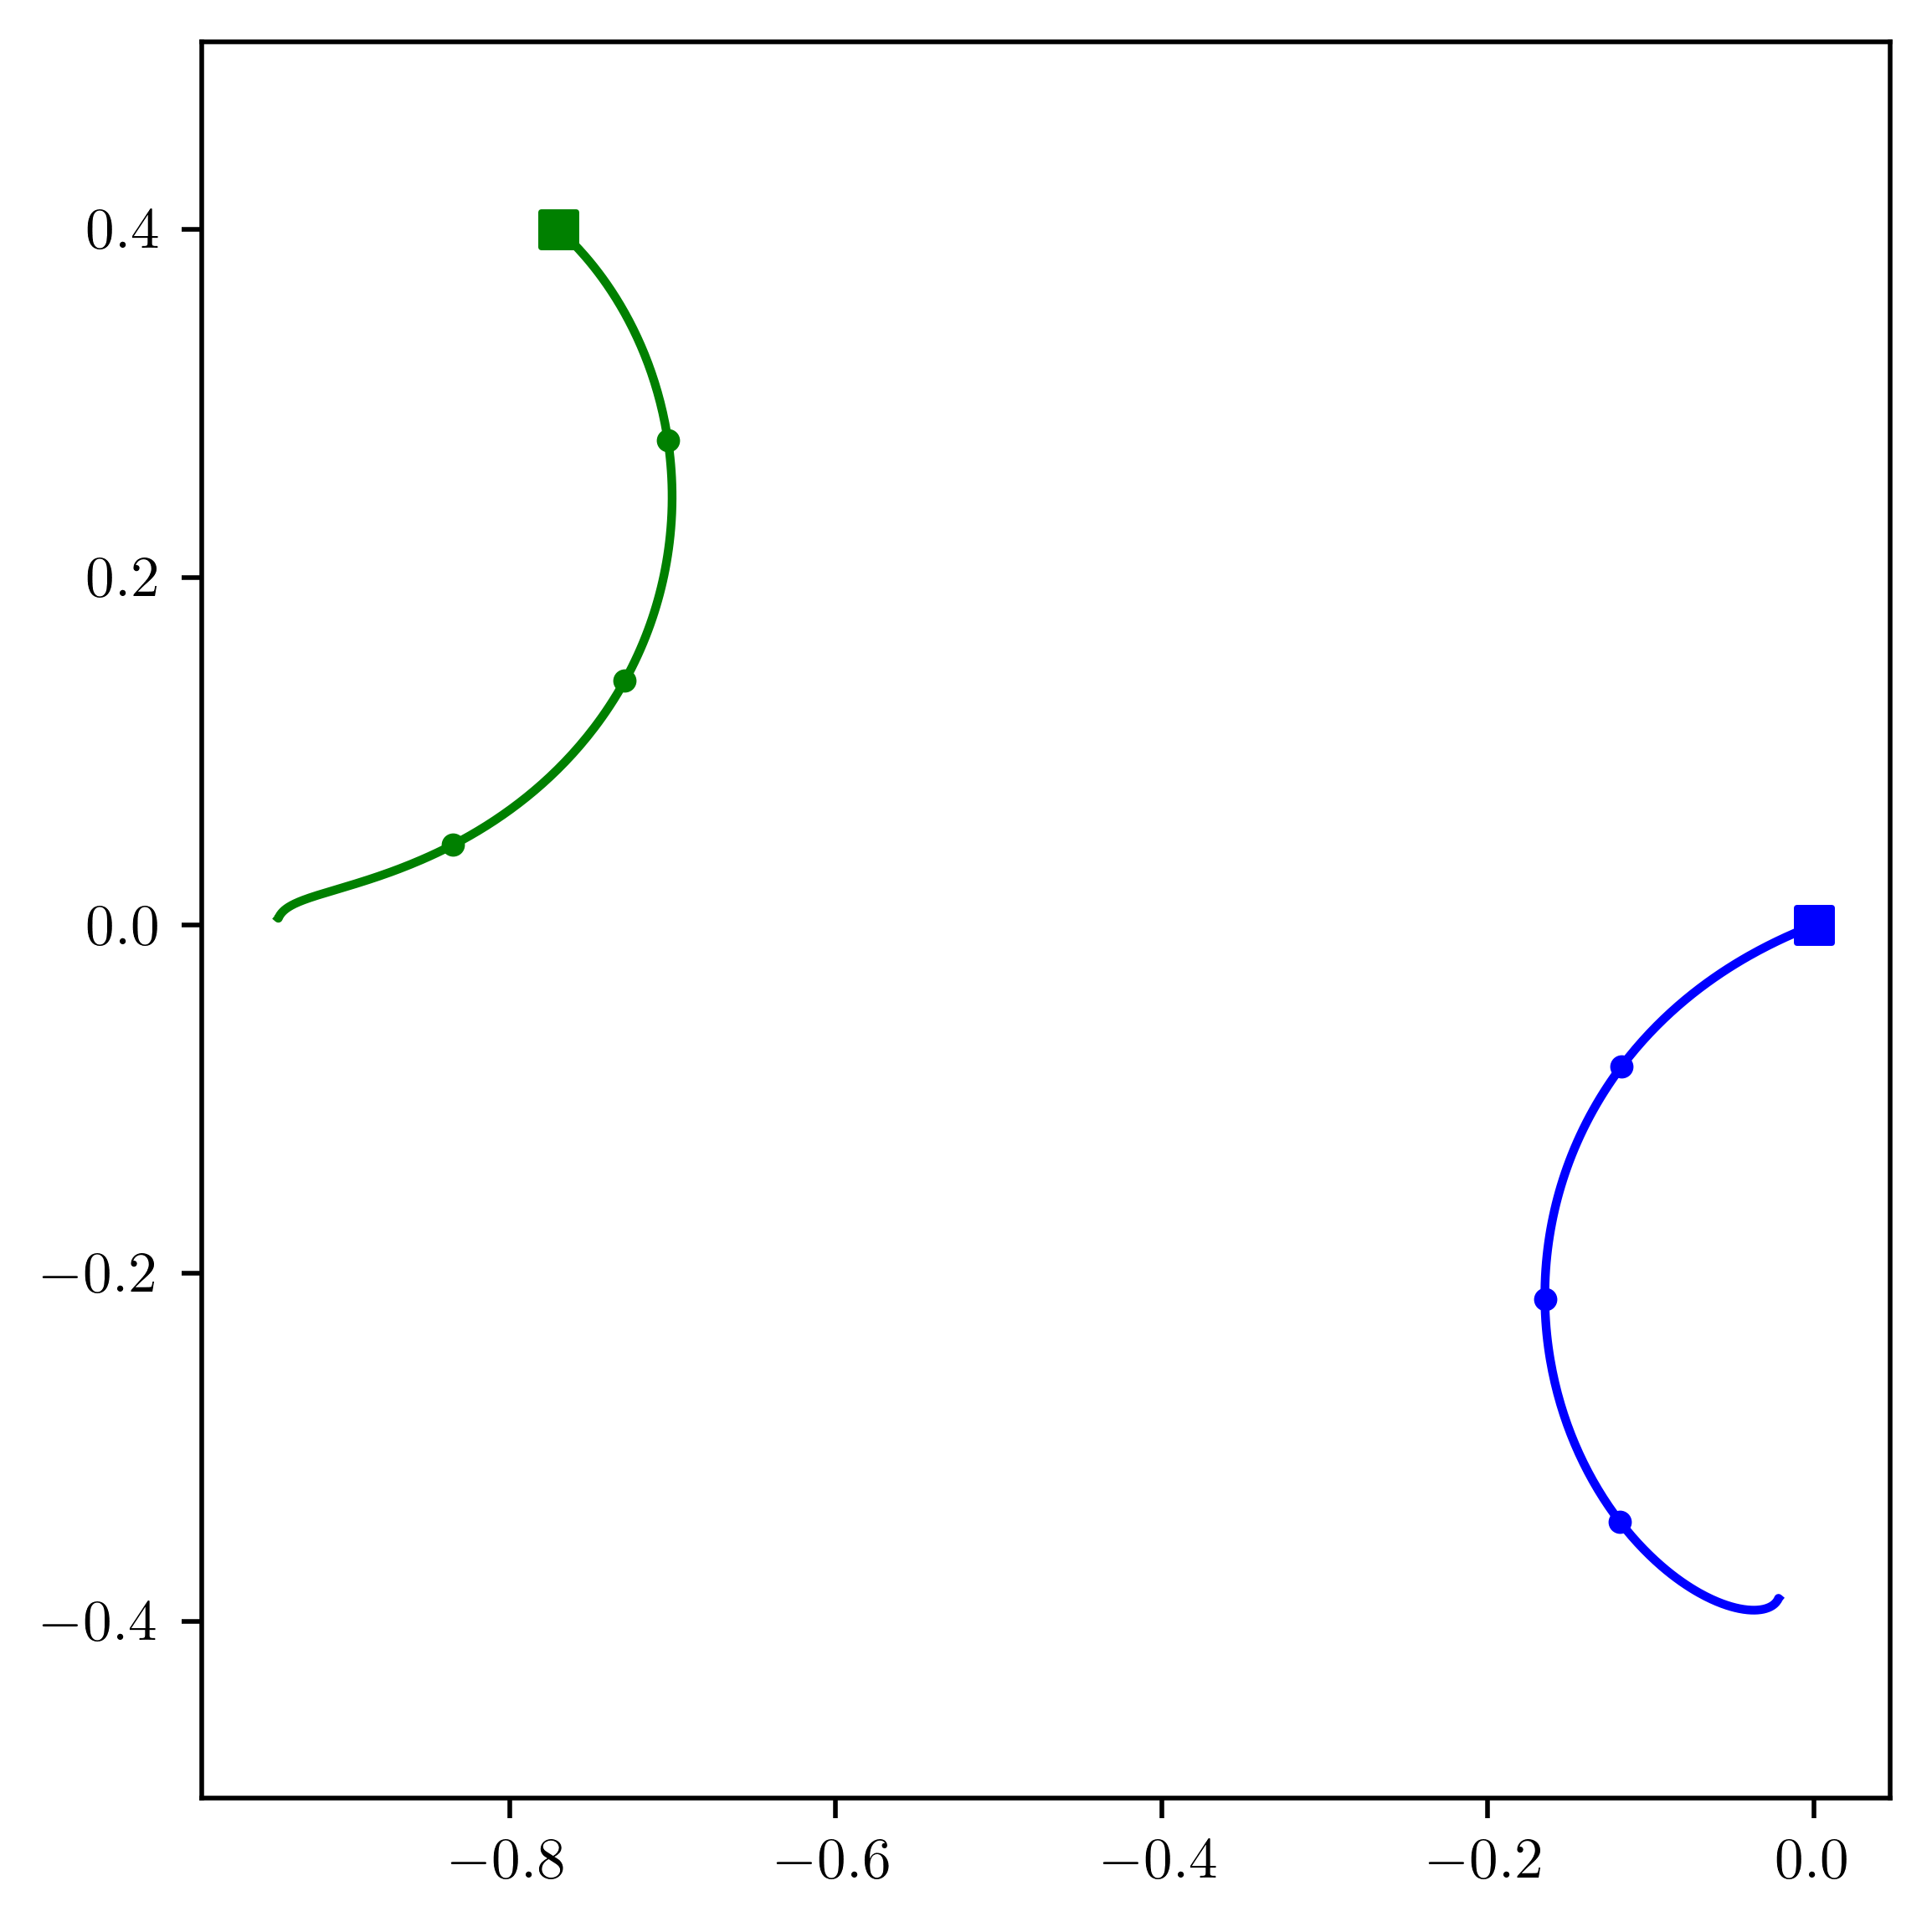

In [77]:
def ini_particle(name='...'):
#     tptc = particleClass.finiteDipole2D(length=length, name='ptc2D')
    tptc = particleClass.limFiniteDipole2D(length=length, name='ptc2D')
    tptc.u = u
    prb1.add_obj(tptc)
    return tptc

update_fun, update_order = '5bs', (1e-12, 1e-15)
overlap_epsilon = 1e-5
u, length = 1, 1
attract, align = 0, 0
tmax = 100
# x, y, phi1, phi2 = 0, 4,    np.pi / 2, np.pi / 2   # Liebergen2015, Fig 4.1, case b
# x, y, phi1, phi2 = 2, 4,    np.pi / 2, np.pi / 2   # Liebergen2015, Fig 4.1, case c
# x, y, phi1, phi2 = 4, 2.25, np.pi / 2, np.pi / 2   # Liebergen2015, Fig 4.1, case d
# x, y, phi1, phi2 = 4, 1,    np.pi / 2, np.pi / 2   # Liebergen2015, Fig 4.1, case e
# x, y, phi1, phi2 = 4, 0,    np.pi / 2, np.pi / 2   # Liebergen2015, Fig 4.1, case f

# y, x, phi1, phi2 = 0.5,        -8, np.pi, 0   # Liebergen2015, Fig 4.2, case b
# y, x, phi1, phi2 = 0.874,      -8, np.pi, 0   # Liebergen2015, Fig 4.2, case c
# y, x, phi1, phi2 = 0.875,      -8, np.pi, 0   # Liebergen2015, Fig 4.2, case d
# y, x, phi1, phi2 = 1,          -8, np.pi, 0   # Liebergen2015, Fig 4.2, case e
# y, x, phi1, phi2 = 0.87465, -8, np.pi, 0   # Liebergen2015, Fig 4.2, case f
# y, x, phi1, phi2 = 0.87465151, -8, np.pi, 0   # Liebergen2015, Fig 4.2, case f

# x, y, phi1, phi2 = 0.5,  1,    0, np.pi   # Liebergen2015, Fig 4.5, case a
# x, y, phi1, phi2 = 0,    1.15, 0, np.pi   # Liebergen2015, Fig 4.5, case b
# x, y, phi1, phi2 = 0.649, 0.7,  0, np.pi   # Liebergen2015, Fig 4.5, case c

# x, y, phi1, phi2 = -0.85,  0,    0, np.pi / 3       # Liebergen2015, Fig 4.8, case b
# x, y, phi1, phi2 =  0,    -0.9,  0, np.pi / 3       # Liebergen2015, Fig 4.8, case c
# x, y, phi1, phi2 = -0.3,  -1.15, 0, np.pi * 2 / 3   # Liebergen2015, Fig 4.8, case d
# x, y, phi1, phi2 = -0.75,  0,    0, np.pi * 2 / 3   # Liebergen2015, Fig 4.8, case e
x, y, phi1, phi2 = -0.77,  0.4,  0, np.pi * 2 / 3   # Liebergen2015, Fig 4.8, case f

prb1 = problemClass.finiteDipole2DProblem(name='testFiniteDipole2D')
prb1.attract = attract
prb1.align = align
prb1.update_fun = update_fun
prb1.update_order = update_order

tptc1 = ini_particle(name='ptc2D')
tptc1.X = (0, 0)
tptc1.phi = phi1
tptc2 = ini_particle(name='ptc2D')
# print(tptc1.phi, tptc1.P1)
# print(tptc2.phi, tptc2.P1)
tptc2.X = (x, y)
tptc2.phi = phi2
# print(tptc2.phi, tptc2.P1)

rlt1 = relationClass._baseRelation2D(name='relation1')
rlt1.overlap_epsilon = overlap_epsilon
prb1.relationHandle = rlt1

act1 = interactionClass.selfPropelled2D(name='selfPropelled2D')
prb1.add_act(act1)
act2 = interactionClass.limFiniteDipole2D(name='FiniteDipole2D')
prb1.add_act(act2)

prb1.update_prepare()
prb1.update_self(t1=tmax)

################################################################################3

# %matplotlib notebook
%matplotlib inline

figsize=np.array((9, 9))*0.5
dpi = 500 if 'inline' in matplotlib.get_backend() else 100
plt_tmin = -1
nmarker = 0.1

fig, axi = plt.subplots(1, 1, figsize=figsize, dpi=dpi, constrained_layout=True)
fig.patch.set_facecolor('white')
for obji, color in zip(prb1.obj_list, ('b', 'g')):
    tidx = prb1.t_hist >= plt_tmin
    X_hist = obji.X_hist[tidx]
    axi.scatter(X_hist[0, 0], X_hist[0, 1], c=color, marker='s')
    axi.plot(X_hist[:, 0], X_hist[:, 1], '.-', color=color, markevery=nmarker)
support_fun.set_axes_equal(axi)


### 3 finite dipoles

  0%|          | 0/100 [00:00<?, ?it/s]

<AxesSubplot:>

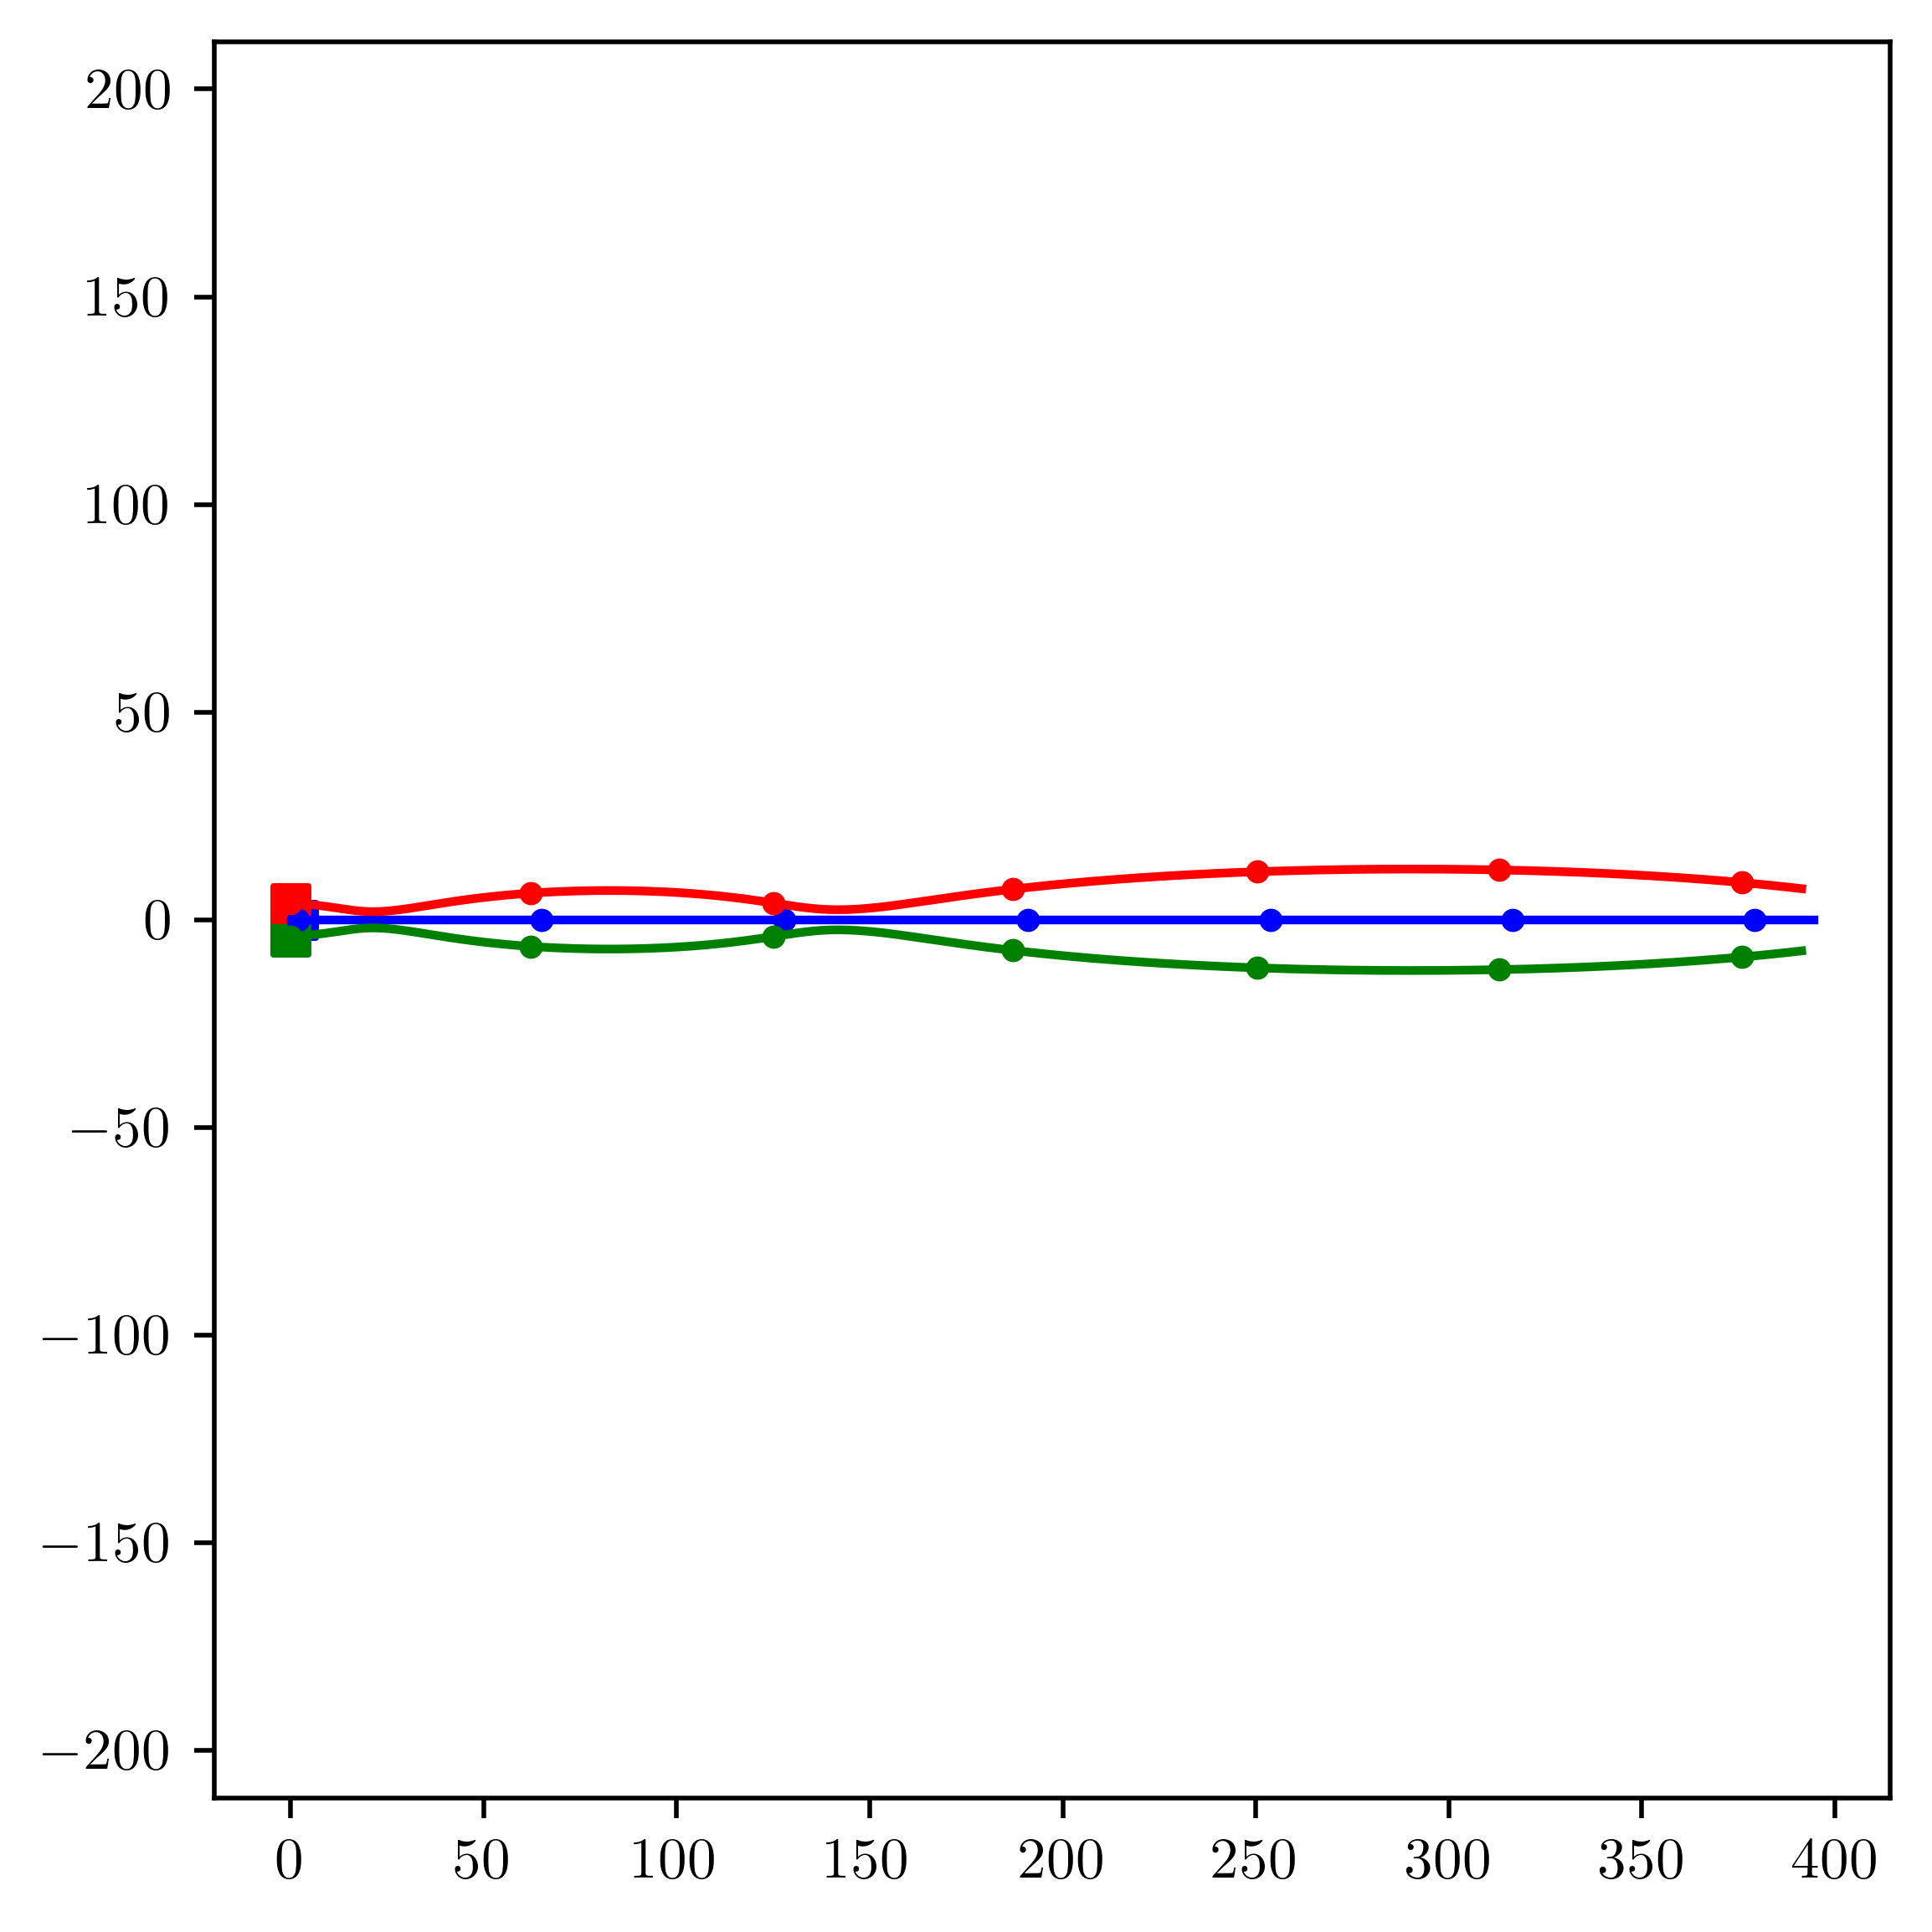

In [107]:
def ini_particle(name='...'):
#     tptc = particleClass.finiteDipole2D(length=length, name='ptc2D')
    tptc = particleClass.limFiniteDipole2D(length=length, name='ptc2D')
    tptc1.phi = 0
    tptc.u = u
    prb1.add_obj(tptc)
    return tptc

update_fun, update_order = '5bs', (1e-12, 1e-15)
overlap_epsilon = 1e-5
u, length = 1, 1
attract, align = 0, 0
tmax = 400

# H0, X0 = 4, 0,   # Liebergen2015, Fig 5.1, case b
# H0, X0 = 3, 1,   # Liebergen2015, Fig 5.1, case c
H0, X0 = 4, 2,   # Liebergen2015, Fig 5.1, case d

prb1 = problemClass.finiteDipole2DProblem(name='testFiniteDipole2D')
prb1.attract = attract
prb1.align = align
prb1.update_fun = update_fun
prb1.update_order = update_order

tptc1 = ini_particle(name='ptc2D')
tptc1.X = (X0, 0)
tptc2 = ini_particle(name='ptc2D')
tptc2.X = (0, -H0)
tptc3 = ini_particle(name='ptc2D')
tptc3.X = (0, H0)

rlt1 = relationClass._baseRelation2D(name='relation1')
rlt1.overlap_epsilon = overlap_epsilon
prb1.relationHandle = rlt1

act1 = interactionClass.selfPropelled2D(name='selfPropelled2D')
prb1.add_act(act1)
act2 = interactionClass.limFiniteDipole2D(name='FiniteDipole2D')
prb1.add_act(act2)

prb1.update_prepare()
prb1.update_self(t1=tmax)

################################################################################3

# %matplotlib notebook
%matplotlib inline

figsize=np.array((9, 9))*0.5
dpi = 500 if 'inline' in matplotlib.get_backend() else 100
plt_tmin = -1
nmarker = 0.1

fig, axi = plt.subplots(1, 1, figsize=figsize, dpi=dpi, constrained_layout=True)
fig.patch.set_facecolor('white')
for obji, color in zip(prb1.obj_list, ('b', 'g', 'r')):
    tidx = prb1.t_hist >= plt_tmin
    X_hist = obji.X_hist[tidx]
    axi.scatter(X_hist[0, 0], X_hist[0, 1], c=color, marker='s')
    axi.plot(X_hist[:, 0], X_hist[:, 1], '.-', color=color, markevery=nmarker)
support_fun.set_axes_equal(axi)


## dbg limFiniteDipole2D.UDipole2Dat

In [197]:
u, length = 1, 1
xlim, ylim = (0.01, 0.02), (0.03, 0.04)

tptc1 = particleClass.limFiniteDipole2D(length=length, name='ptc2D')
tptc1.u = u
tptc1.X = (-0.5, -0.5)
tptc1.phi = 0

# a1 = []
# for _ in range(10000):
#     zn = np.array((1 + 1j * 1)) * np.arange(10)
#     i0 = np.random.randint(0, 10)
#     ux1, uy1 = tptc1.UDipole2Dat(zn)
#     ux2, uy2 = tptc1.UDipole2Dat(zn[i0])
#     t1 = np.abs(ux1[i0] - ux2) + np.abs(uy1[i0] - uy2)
#     a1.append(t1)
# #     print(tptc1.UDipole2Dat(zn)[i0], tptc1.UDipole2Dat(zn[i0]))
# print(np.abs(a1).max())
   
a1 = []
for _ in range(10000):
    xrange, yrange = np.meshgrid(np.linspace(*xlim, 100), 
                                 np.linspace(*ylim, 100))
    zrange = xrange + 1j * yrange
    i0, i1 = np.random.randint(0, 100, 2)
    t1 = tptc1.UDipole2Dat(zrange)
    t2 = tptc1.UDipole2Dat(zrange[i0, i1])
    # print(t1[0][i0, i1], t2[0])
    # print(t1[1][i0, i1], t2[1])
    a1.append(np.abs(t1[0][i0, i1] - t2[0]) + np.abs(t1[1][i0, i1] - t2[1]))
print(np.abs(a1).max())

0.0


In [21]:
u0, length, X0, phi0 = 1, 1, np.zeros(2), np.pi / 2
xlim, ylim = (-10, 10), (-10, 10)

tptc2 = particleClass.finiteDipole2D(length=length, name='ptc2D')
tptc2.u = u0
tptc2.X = X0
tptc2.phi = phi0

# a1 = []
# for _ in range(10000):
#     zn = np.array((1 + 1j * 1)) * np.arange(10)
#     i0 = np.random.randint(0, 10)
#     w1 = tptc2.UDipole2Dat(zn)
#     w2 = tptc2.UDipole2Dat(zn[i0])
#     ux1, uy1 = np.real(w1), -np.imag(w1)
#     ux2, uy2 = np.real(w2), -np.imag(w2)
#     t1 = np.abs(ux1[i0] - ux2) + np.abs(uy1[i0] - uy2)
#     a1.append(t1)
# #     print(tptc1.UDipole2Dat(zn)[i0], tptc1.UDipole2Dat(zn[i0]))
# print(np.abs(a1).max())

a1 = []
for _ in range(10000):
    xrange, yrange = np.meshgrid(np.linspace(*xlim, 100), 
                                 np.linspace(*ylim, 100))
    zrange = xrange + 1j * yrange
    i0, i1 = np.random.randint(0, 100, 2)
    t1 = tptc2.UDipole2Dat(zrange)
    t2 = tptc2.UDipole2Dat(zrange[i0, i1])
    # print(t1[0][i0, i1], t2[0])
    # print(t1[1][i0, i1], t2[1])
    a1.append(np.abs(t1[i0, i1] - t2))
print(np.abs(a1).max())


0.0


## compare fluid pattern

#### velocity

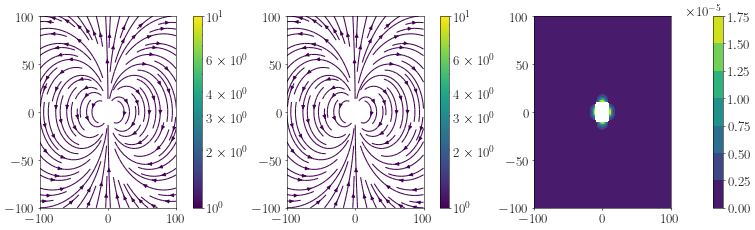

In [62]:
u0, length, X0, phi0 = 1, 1, np.zeros(2), np.pi / 2
xlim, ylim = (-100, 100), (-100, 100)

tptc1 = particleClass.limFiniteDipole2D(length=length, name='ptc2D')
tptc1.u = u0
tptc1.X = X0
tptc1.phi = phi0

tptc2 = particleClass.finiteDipole2D(length=length, name='ptc2D')
tptc2.u = u0
tptc2.X = X0
tptc2.phi = phi0

xrange, yrange = np.meshgrid(np.linspace(*xlim, 102), 
                             np.linspace(*ylim, 102))
zrange = xrange + 1j * yrange
tidx = (xlim[0] * 0.1 < xrange) * (xrange < xlim[1] * 0.1) * (ylim[0] * 0.1 < yrange) * (yrange < ylim[1] * 0.1)
u1x, u1y = tptc1.UDipole2Dat(zrange)
u1x[tidx] = np.nan
u1y[tidx] = np.nan
u1 = np.sqrt(u1x ** 2 + u1y ** 2)
w2 = tptc2.UDipole2Dat(zrange)
u2x, u2y = np.real(w2), -np.imag(w2)
u2x[tidx] = np.nan
u2y[tidx] = np.nan
u2 = np.sqrt(u2x ** 2 + u2y ** 2)



################################################################################3
%matplotlib inline
plt.rcParams.update({'font.size': 20})
figsize, dpi = np.array((30, 9))*0.5, (50 if 'inline' in matplotlib.get_backend() else 100)

fig, axs = plt.subplots(1, 3, figsize=figsize, dpi=dpi, constrained_layout=True)
fig.patch.set_facecolor('white')
norm = mcolors.LogNorm(vmin=u0*1e0, vmax=u0*1e1)
# norm = mcolors.Normalize()

axi = axs[0]
strmi = axi.streamplot(xrange, yrange, u1x, u1y, color=u1, norm=norm, cmap=plt.get_cmap('viridis'))
fig.colorbar(strmi.lines, ax=axi)

axi = axs[1]
strmi = axi.streamplot(xrange, yrange, u2x, u2y, color=u2, norm=norm, cmap=plt.get_cmap('viridis'))
fig.colorbar(strmi.lines, ax=axi, )

axi = axs[2]
cnti = axi.contourf(xrange, yrange, np.abs(u2-u1), norm=mcolors.Normalize(), cmap=plt.get_cmap('viridis'))
fig.colorbar(cnti, ax=axi)


#### rotation

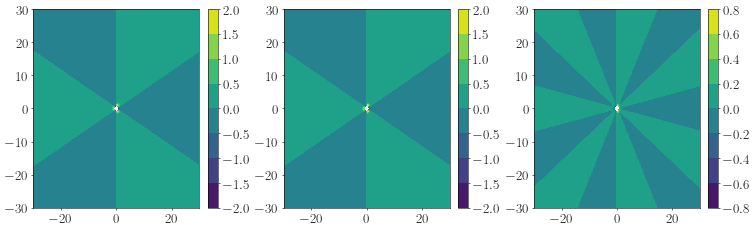

In [103]:
u0, length, X0, phi0 = 1, 1, np.zeros(2), np.pi / 2
xlim, ylim = (-30, 30), (-30, 30)
ln, phin = 1, np.pi / 2 * 2

tptc1 = particleClass.limFiniteDipole2D(length=length, name='ptc2D')
tptc1.u = u0
tptc1.X = X0
tptc1.phi = phi0

tptc2 = particleClass.finiteDipole2D(length=length, name='ptc2D')
tptc2.u = u0
tptc2.X = X0
tptc2.phi = phi0

xrange, yrange = np.meshgrid(np.linspace(*xlim, 102), 
                             np.linspace(*ylim, 102))
zrange = xrange + 1j * yrange
tidx = (xlim[0] * 0.01 < xrange) * (
    xrange < xlim[1] * 0.01) * (
    ylim[0] * 0.01 < yrange) * (
    yrange < ylim[1] * 0.01)
# tidx = []
w1 = tptc1.WDipole2Dat(zrange, phin)
w1[tidx] = np.nan

t1 = ln / 2 * np.exp(1j * (phin + np.pi / 2))
zrangel = zrange + t1
zranger = zrange - t1
wol = tptc2.UDipole2Dat(zrangel)
wor = tptc2.UDipole2Dat(zranger)
w2 = np.real((wor - wol) * np.exp(1j * phin)) / ln
w2[tidx] = np.nan


################################################################################3
%matplotlib inline
plt.rcParams.update({'font.size': 20})
figsize, dpi = np.array((30, 9))*0.5, (50 if 'inline' in matplotlib.get_backend() else 100)

fig, axs = plt.subplots(1, 3, figsize=figsize, dpi=dpi, constrained_layout=True)
fig.patch.set_facecolor('white')
# norm = mcolors.LogNorm(vmin=u0*1e0, vmax=u0*1e1)
# norm = mcolors.LogNorm()
norm = mcolors.Normalize()

axi = axs[0]
cnti = axi.contourf(xrange, yrange, w1, norm=norm, cmap=plt.get_cmap('viridis'))
fig.colorbar(cnti, ax=axi)

axi = axs[1]
cnti = axi.contourf(xrange, yrange, w1, norm=norm, cmap=plt.get_cmap('viridis'))
fig.colorbar(cnti, ax=axi)

axi = axs[2]
cnti = axi.contourf(xrange, yrange, w1-w2, norm=mcolors.Normalize(), cmap=plt.get_cmap('viridis'))
fig.colorbar(cnti, ax=axi)


## test, collective fish

  0%|          | 0/100 [00:00<?, ?it/s]

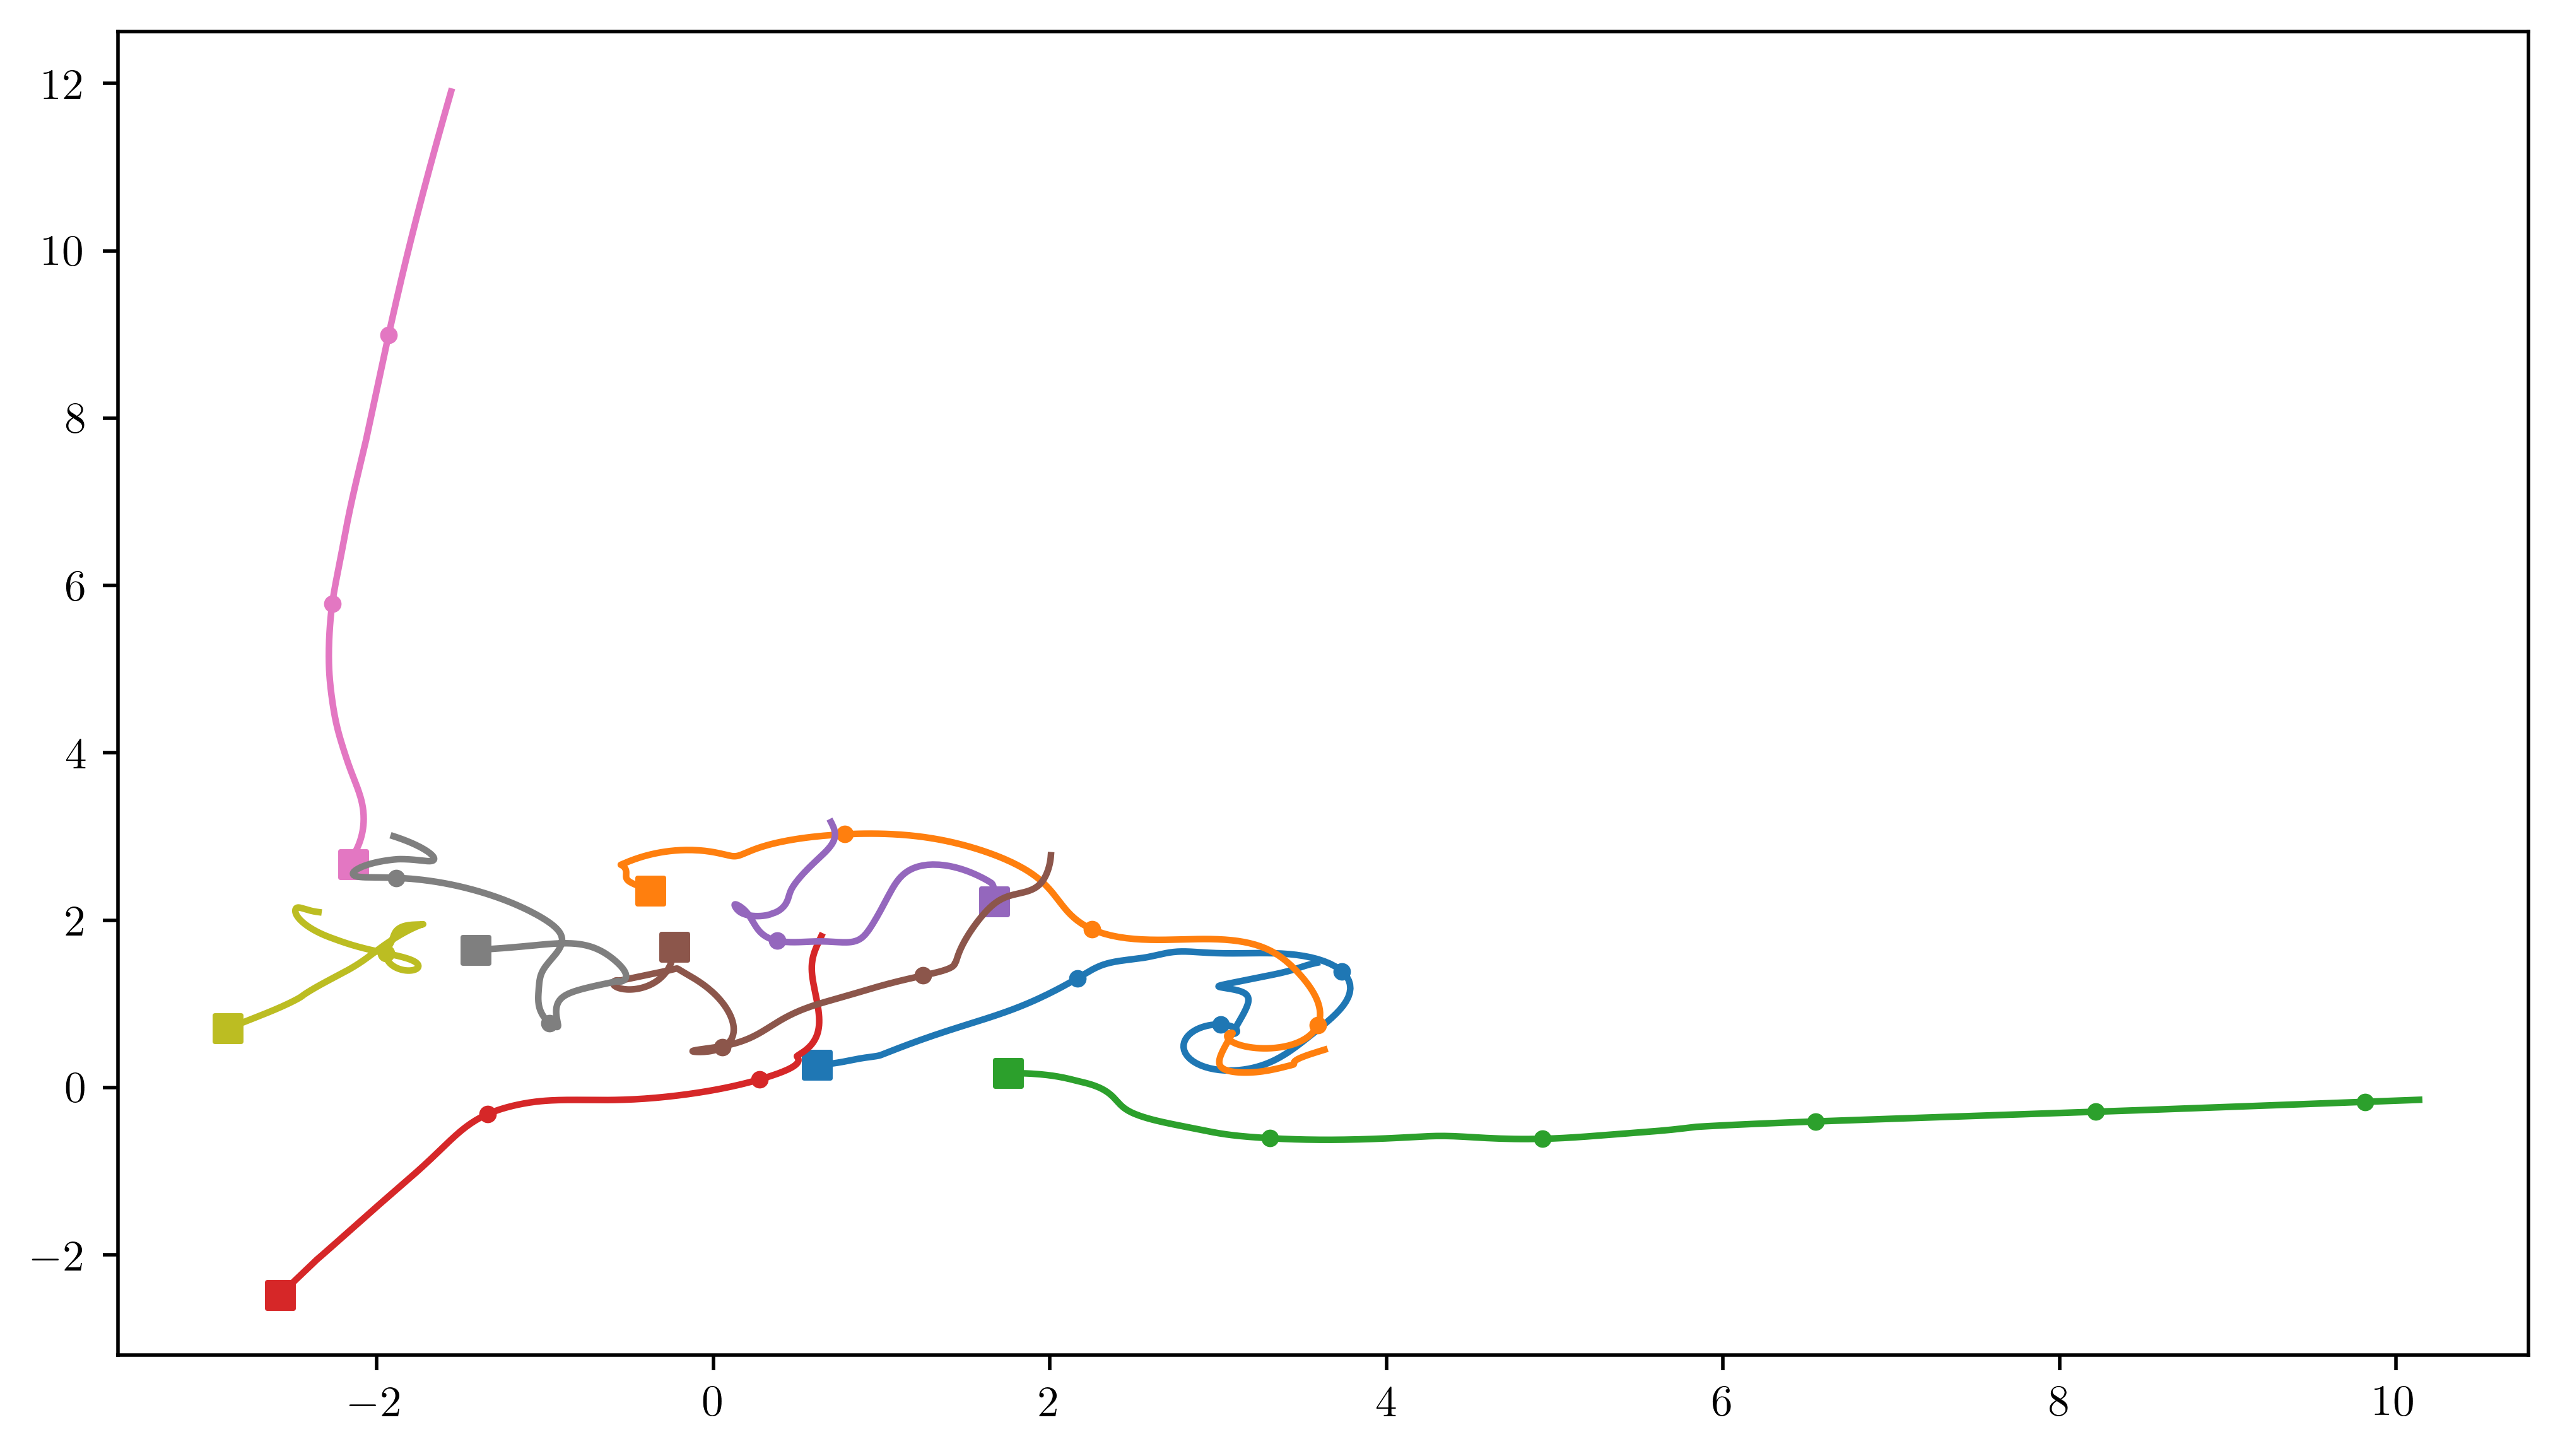

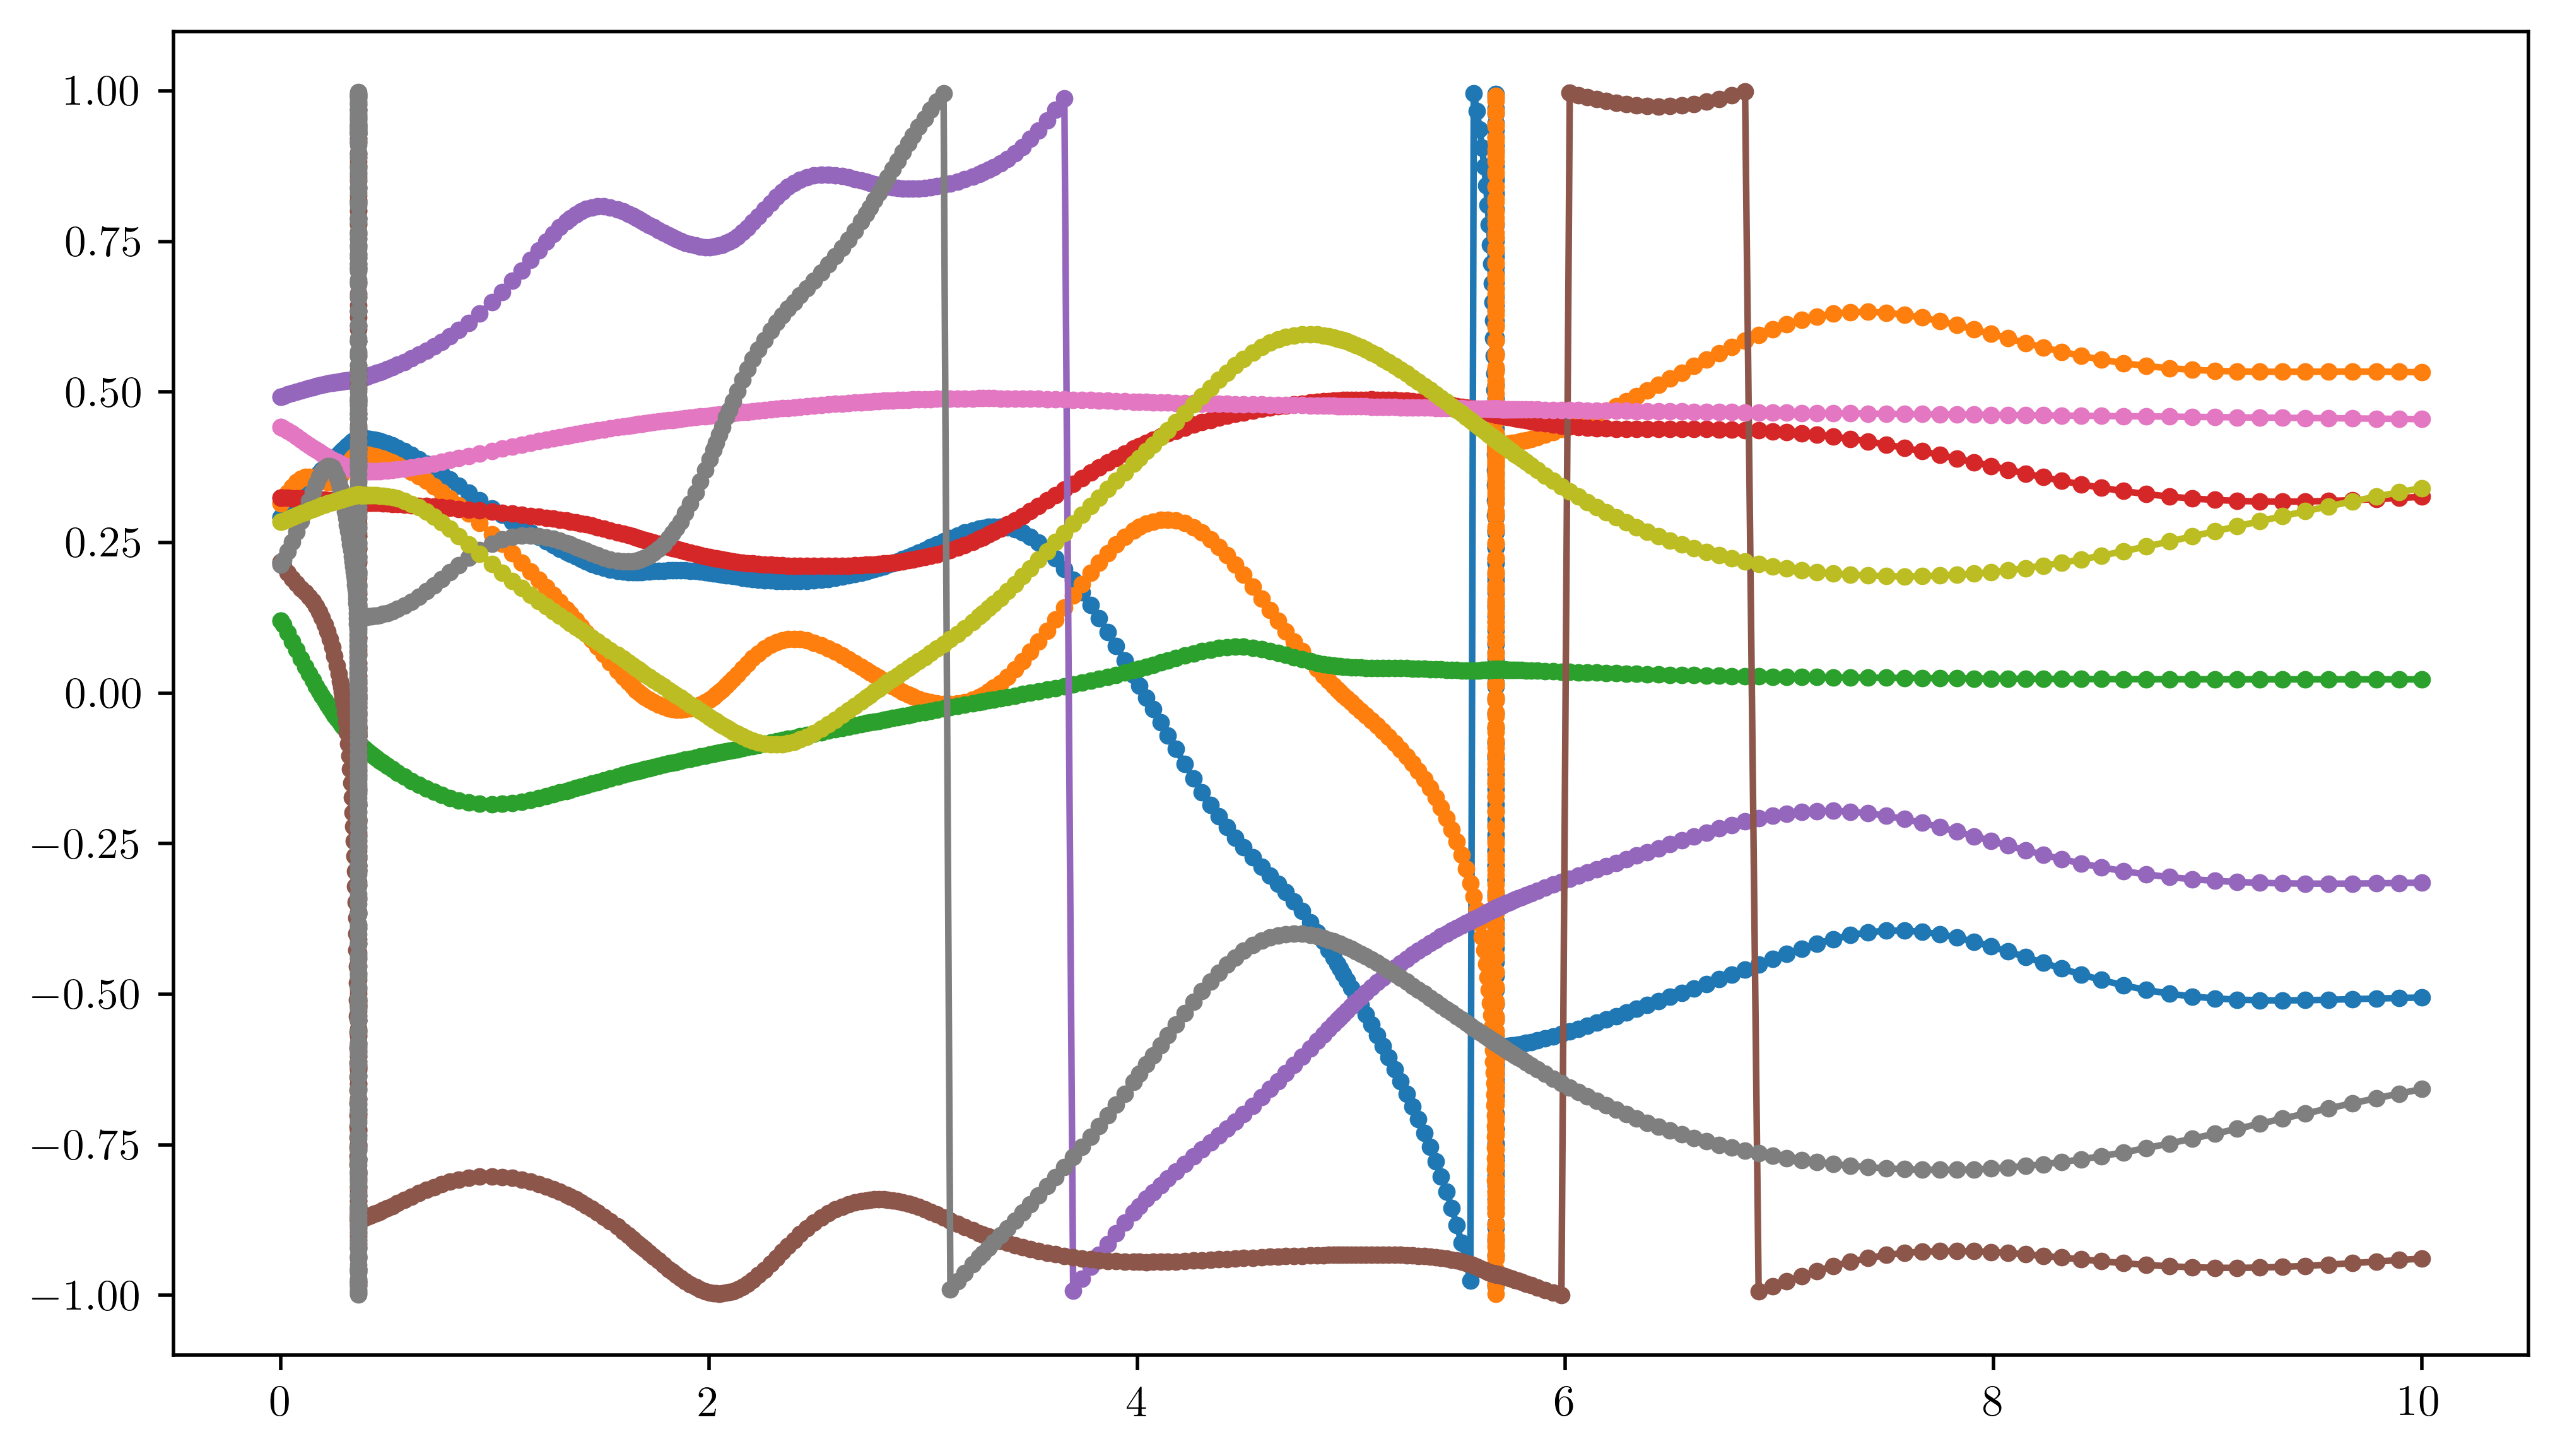

In [113]:
update_fun, update_order = '5bs', (1e-9, 1e-12)
test_n = 10
overlap_epsilon = 1e-2
u, length = 1, 1
attract, align = 1, 1
tmax = 10

prb1 = problemClass.finiteDipole2DProblem(name='testFiniteDipole2D')
prb1.attract = attract
prb1.align = align
prb1.update_fun = update_fun
prb1.update_order = update_order

np.random.seed(0)
for _ in range(test_n):
    tptc = particleClass.limFiniteDipole2D(length=length, name='ptc2D')
    tptc.P1 = np.random.sample((2,))
    tptc.X = np.random.uniform(-3, 3, (2,))
    tptc.u = u
    prb1.add_obj(tptc)

rlt1 = relationClass.VoronoiBaseRelation2D(name='relation1')
rlt1.overlap_epsilon = overlap_epsilon
prb1.relationHandle = rlt1

act1 = interactionClass.selfPropelled2D(name='selfPropelled2D')
prb1.add_act(act1)
act2 = interactionClass.limFiniteDipole2D(name='FiniteDipole2D')
prb1.add_act(act2)
act3 = interactionClass.Attract2D(name='Attract2D')
prb1.add_act(act3)
act4 = interactionClass.Align2D(name='Align2D')
prb1.add_act(act4)

prb1.update_prepare()
prb1.update_self(t1=tmax)


################################################################################3

# %matplotlib notebook
%matplotlib inline

figsize = np.array((16, 9))*0.5
dpi = 500 if 'inline' in matplotlib.get_backend() else 100
plt_tmin = -1
nmarker = 0.1

fig, axi = plt.subplots(1, 1, figsize=figsize, dpi=dpi, constrained_layout=True)
fig.patch.set_facecolor('white')
for obji, i0 in zip(prb1.obj_list, range(9)):
    color = 'C%d' % i0
    tidx = prb1.t_hist >= plt_tmin
    X_hist = obji.X_hist[tidx]
    axi.scatter(X_hist[0, 0], X_hist[0, 1], c=color, marker='s')
    axi.plot(X_hist[:, 0], X_hist[:, 1], '.-', color=color, markevery=nmarker)
# support_fun.set_axes_equal(axi)

fig, axi = plt.subplots(1, 1, figsize=figsize, dpi=dpi, constrained_layout=True)
fig.patch.set_facecolor('white')
for obji, i0 in zip(prb1.obj_list, range(9)):
    color = 'C%d' % i0
    axi.plot(prb1.t_hist, obji.phi_hist / np.pi, '.-', color=color)


In [164]:
np.alltrue(np.isfinite(np.random.sample(10)))

True

In [1]:
update_fun, update_order = '5bs', (1e-3, 1e-5)
test_n = 5
overlap_epsilon = 1e-2
u, length = 1, 1
attract, align = 1, 1
tmax = 10

prb1 = problemClass.finiteDipole2DProblem(name='testFiniteDipole2D')
prb1.attract = attract
prb1.align = align
prb1.update_fun = update_fun
prb1.update_order = update_order

np.random.seed(0)
for _ in range(test_n):
    tptc = particleClass.limFiniteDipole2D(length=length, name='ptc2D')
    tptc.P1 = np.random.sample((2,))
    tptc.X = np.random.uniform(-3, 3, (2,))
    tptc.u = u
    prb1.add_obj(tptc)

rlt1 = relationClass.VoronoiBaseRelation2D(name='relation1')
rlt1.overlap_epsilon = overlap_epsilon
prb1.relationHandle = rlt1

act1 = interactionClass.selfPropelled2D(name='selfPropelled2D')
prb1.add_act(act1)
act2 = interactionClass.limFiniteDipole2D(name='FiniteDipole2D')
prb1.add_act(act2)
act3 = interactionClass.Attract2D(name='Attract2D')
prb1.add_act(act3)
act4 = interactionClass.Align2D(name='Align2D')
prb1.add_act(act4)

prb1.update_prepare()
prb1.update_self(t1=tmax)


################################################################################3

# %matplotlib notebook
%matplotlib inline

figsize = np.array((16, 9))*0.5
dpi = 500 if 'inline' in matplotlib.get_backend() else 100
plt_tmin = -1
nmarker = 0.1

fig, axi = plt.subplots(1, 1, figsize=figsize, dpi=dpi, constrained_layout=True)
fig.patch.set_facecolor('white')
for obji, i0 in zip(prb1.obj_list, range(9)):
    color = 'C%d' % i0
    tidx = prb1.t_hist >= plt_tmin
    X_hist = obji.X_hist[tidx]
    axi.scatter(X_hist[0, 0], X_hist[0, 1], c=color, marker='s')
    axi.plot(X_hist[:, 0], X_hist[:, 1], '.-', color=color, markevery=nmarker)
# support_fun.set_axes_equal(axi)

fig, axi = plt.subplots(1, 1, figsize=figsize, dpi=dpi, constrained_layout=True)
fig.patch.set_facecolor('white')
for obji, i0 in zip(prb1.obj_list, range(9)):
    color = 'C%d' % i0
    axi.plot(prb1.t_hist, obji.phi_hist / np.pi, '.-', color=color)


NameError: name 'problemClass' is not defined

2.5856787926562774e-10

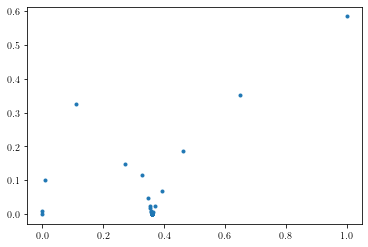

In [141]:
obji = prb1.obj_list[3]
# plt.plot(prb1.t_hist, obji.X_hist, '.')
plt.plot(prb1.t_hist, prb1.dt_hist, '.')
prb1.dt_hist.min()

  0%|          | 0/6 [00:00<?, ?it/s]

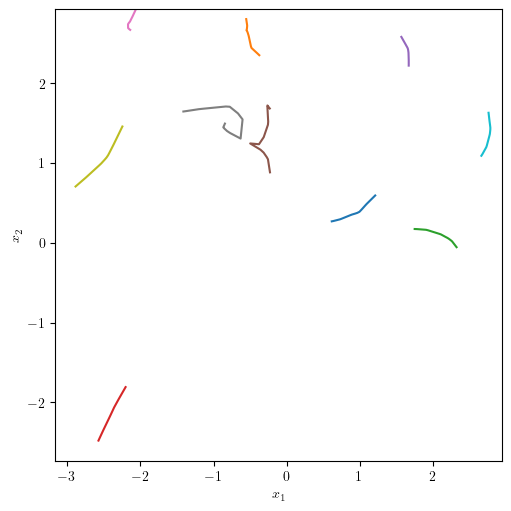

In [142]:
from act_codeStore import support_fun_animation as spanm
from IPython import display

figsize = np.array((5, 5))

anim = spanm.make2D_X_video(prb1.t_hist, prb1.obj_list, figsize=figsize, stp=10, resampling_fct=1, 
                            interp1d_kind='linear')
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)